# <font style="color:rgb(50,120,229)">Sunglass Filter</font>
In this application we will put a sunglass on a face image using naive approach and arithmetic operations.

# <font style="color:rgb(50,120,229)">Import Libraries</font>

In [1]:
// Include libraries
#include "../resource/lib/public/includeLibraries.h"
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/highgui.hpp>

In [2]:
#include "../resource/lib/public/displayImages.h"
#include "../resource/lib/public/matplotlibcpp.h"

In [3]:
using namespace std;

In [4]:
using namespace cv;

In [5]:
using namespace matplotlibcpp;

# <font style="color:rgb(50,120,229)">Load the Face and sunglass Images

In [6]:
// Load the Face Image
Mat faceImage = imread("my.jpg")

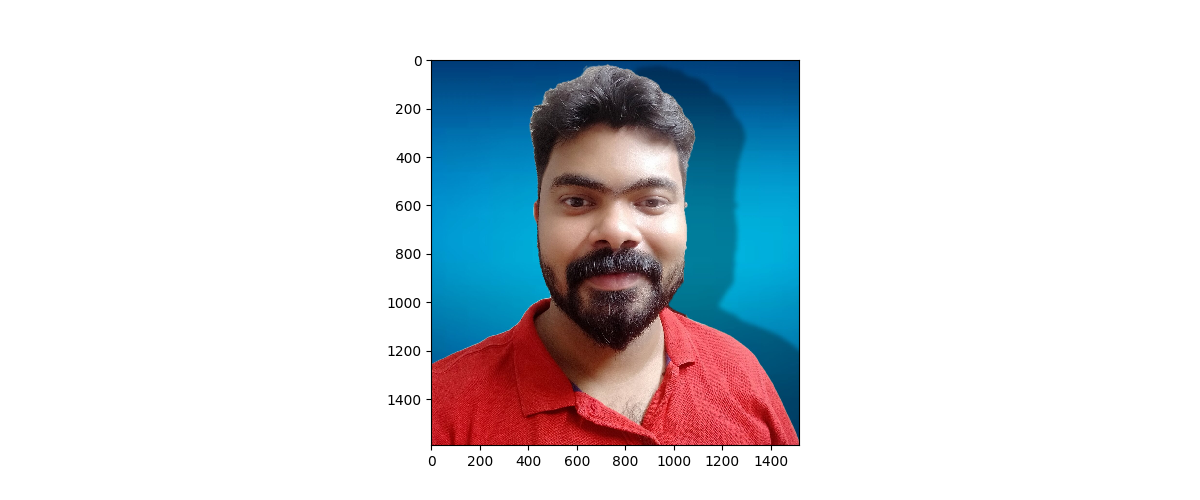

In [7]:
plt::figure_size(1200,500);
plt::imshow(faceImage);
auto pltImg = displayImage(faceImage);
pltImg

In [8]:
cout<<"Image Dimension = "<<faceImage.size()<<endl;
cout<<"Number of channels = "<<faceImage.channels();

Image Dimension = [1517 x 1589]
Number of channels = 3

In [9]:
//Load the sunglass image with alpha channel
Mat glassImage = imread("sunglass.png",-1);

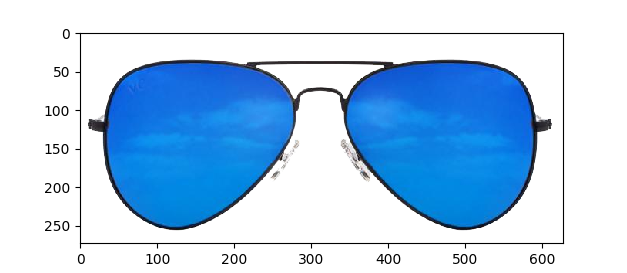

In [10]:
plt::figure_size(627,273);
plt::imshow(glassImage);
pltImg = displayImage(glassImage);
pltImg

In [11]:
cout<<"Image Dimension = "<<glassImage.size()<<endl;
cout<<"Number of channels = "<<glassImage.channels();

Image Dimension = [627 x 273]
Number of channels = 4

In [12]:
//Resize the sunglass image to fit over the eye region
resize(glassImage,glassImage,Size(700,300));

//Seperate the Color and alpha channels
Mat glassRGBAChannels[4];
Mat glassRGBChannels[3];
split(glassImage,glassRGBAChannels);

//Prepare BGR and mask(alpha channel) image
for(int i=0;i<3;i++)
{
    //copy R,G,B channel from RGBA to RGB
    glassRGBChannels[i] = glassRGBAChannels[i];
}

Mat glassBGR, glassMask1;
//BGR Image
merge(glassRGBChannels,3,glassBGR);
//Alpha channel is the 4th channel in RGBA Image
glassMask1 = glassRGBAChannels[3];

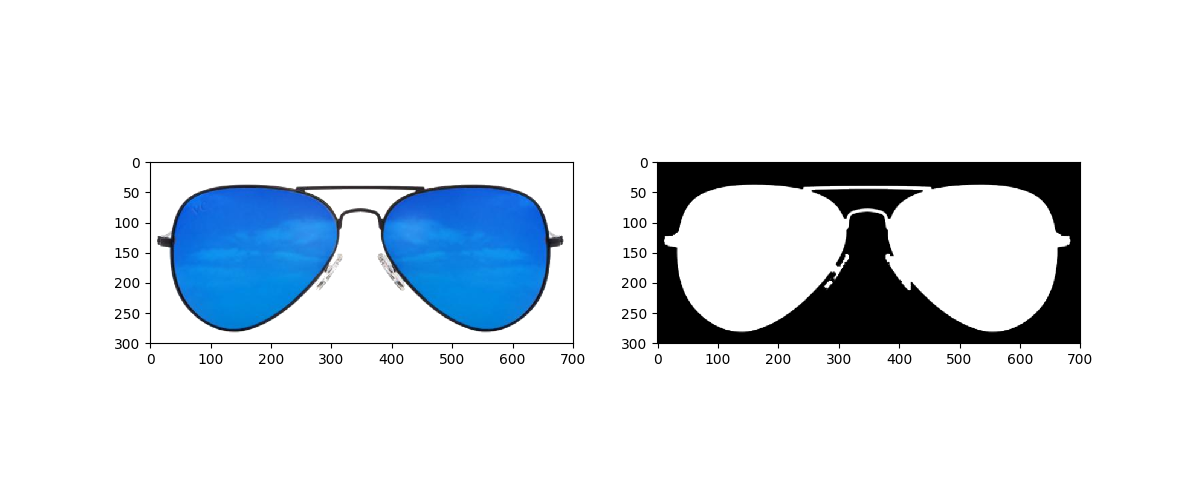

In [13]:
plt::figure_size(1200,500);
plt::subplot(1,2,1);
plt::imshow(glassBGR);
pltImg = displayImage(glassBGR);

plt::subplot(1,2,2);
plt::imshow(glassMask1);
pltImg = displayImage(glassMask1);

pltImg

# <font style="color:rgb(50,120,229)">Find the eye region </font>
From the face image, we can see that the eye region lies approximately from row #500 to row #700 and col #500 to col #1050. Thus, this will be region where the sunglass is to be placed.

# <font style="color:rgb(50,120,229)">Using Naive Replace</font>
This is the easiest way, just replace the eye region with that of the sunglass.

In [14]:
//Make a copy of faceImage
Mat faceWithGlassesNaive = faceImage.clone();
//Select ROI of eye region
//Mat roiFace = faceWithGlassesNaive(Range(500,700),Range(500,1050));
//Replace the eye region with the sunglass image
glassBGR.copyTo(faceWithGlassesNaive(Range(450,750),Range(420,1120)));

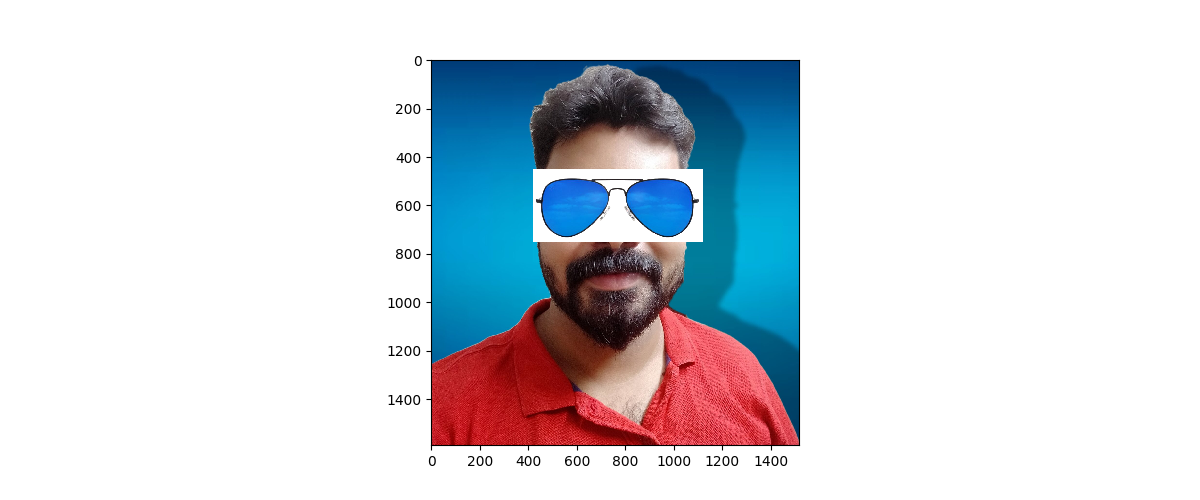

In [15]:
plt::figure_size(1200,500);
plt::imshow(faceWithGlassesNaive);
pltImg = displayImage(faceWithGlassesNaive);
pltImg

You can see that the output is not even close. This is because the BGR image is opaque and will either have a black or white rectangle around the sunglass. 

We need to use a mask along with the sunglass image in order to get the desired output. Let us see how it can be done with very simple steps.

# <font style="color:rgb(50,120,229)">Using Arithmetic Operations and Alpha Mask</font>
In order to put the sunglass on top of the eye region, we need to follow these steps:

1. Create a binary mask with 3-channels using the single channel mask.
1. Extract the eye region from the face image
1. Multiply the Mask with the sunglass to get the masked sunglass
1. Multiply the negative of Mask with the eye region to create a hole in the eye region for the sunglass to be placed.
1. Add the masked sunglass and eye regions to get the combined eye region with the sunglass.
1. Replace the eye region in the original image with that of the output we got in the previous step. This is the final output


In [16]:
//Since Face Image is a 3-channel image, we create a 3 channel image for the mask
Mat glassMask;
Mat glassMaskChannels[] = {glassMask1,glassMask1,glassMask1};
merge(glassMaskChannels,3,glassMask);

In [17]:
// Make the values [0,1] since we are using arithmetic operations
glassMask = glassMask/255;

In [18]:
//Make a copy of faceImage
Mat faceWithGlassesArithmetic = faceImage.clone();

In [19]:
//Extract eye region from the face
Mat eyeRegion = faceWithGlassesArithmetic(Range(450,750),Range(420,1120));

//Create the masked sunglass
Mat maskedGlass;
multiply(glassBGR,glassMask,maskedGlass);

//Multiply the negative of Mask with the eye region to create a hole in the eye region for the sunglass to be placed
Mat eyeROIChannels[3];
split(eyeRegion,eyeROIChannels);
Mat maskedEyeChannels[3];
Mat maskedEye;

for(int i=0;i<3;i++)
{
    // Use the mask to create the masked eye region
    multiply(eyeROIChannels[i],(1-glassMaskChannels[i]),maskedEyeChannels[i]);
}

merge(maskedEyeChannels,3,maskedEye);

//Combine the Sunglass in the Eye Region to get the augmented image
Mat eyeROI;
add(maskedEye,maskedGlass,eyeROI);

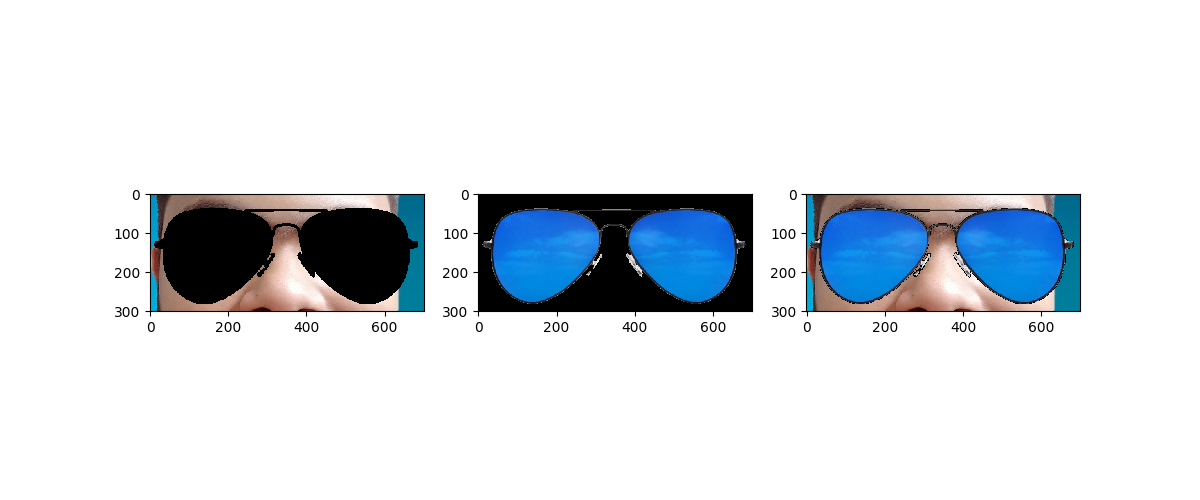

In [20]:
plt::figure_size(1200,500);
plt::subplot(1,3,1);
plt::imshow(maskedEye);
pltImg = displayImage(maskedEye);

plt::subplot(1,3,2);
plt::imshow(maskedGlass);
pltImg = displayImage(maskedGlass);

plt::subplot(1,3,3);
plt::imshow(eyeROI);
pltImg = displayImage(eyeROI);
pltImg

In [21]:
// Replace the eye ROI with the output from the previous section
eyeROI.copyTo(eyeRegion);

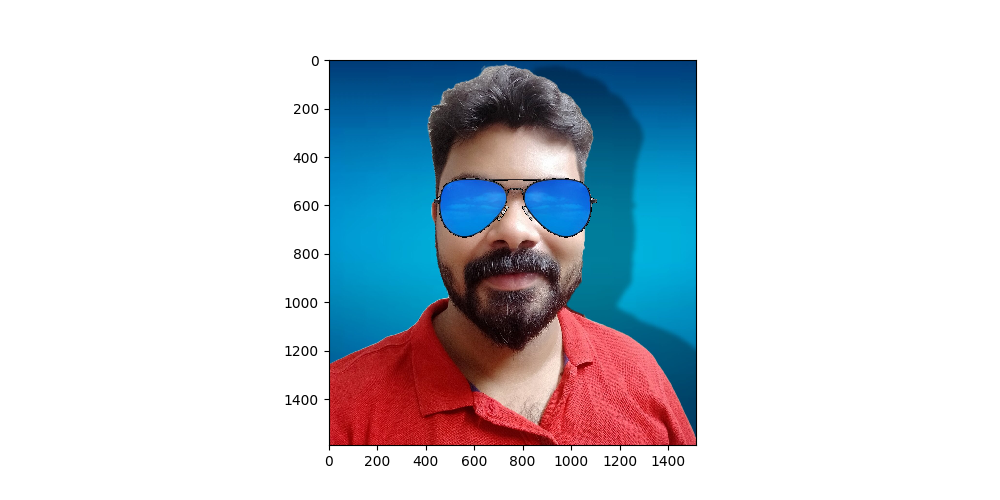

In [22]:
plt::figure_size(1000,500);
plt::imshow(faceWithGlassesArithmetic);
pltImg = displayImage(faceWithGlassesArithmetic);
pltImg

# <font style="color:rgb(50,120,229)">Display the Result</font>

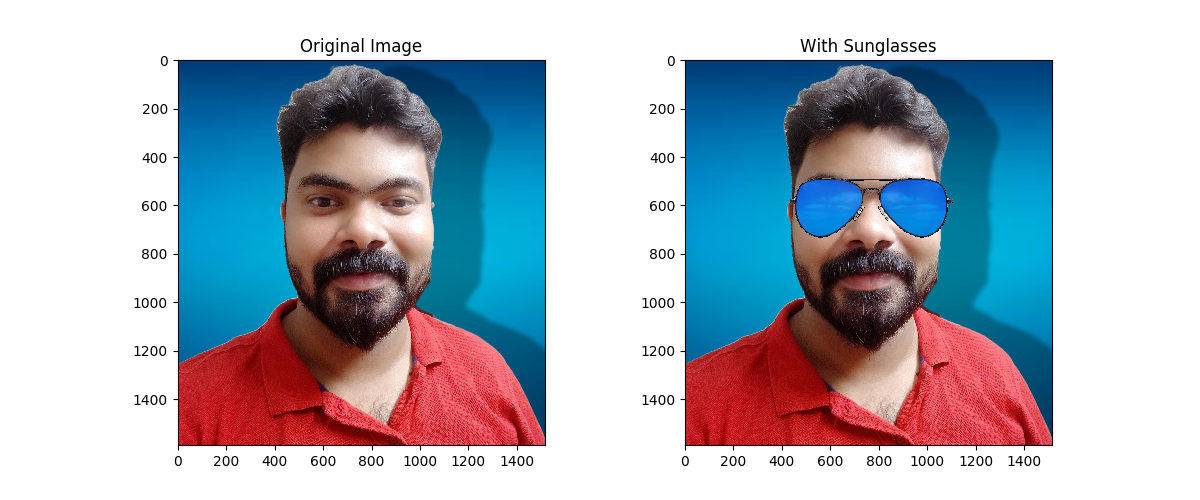

In [23]:
plt::figure_size(1200,500);
plt::subplot(1,2,1);
plt::imshow(faceImage);
plt::title("Original Image");
pltImg = displayImage(faceImage);

plt::subplot(1,2,2);
plt::imshow(faceWithGlassesArithmetic);
plt::title("With Sunglasses");
pltImg = displayImage(faceWithGlassesArithmetic);

pltImg